# BI8040 - notebook project - Eirini & Vasundra

## Model of interest: Mammalian cell cycle
Based on the following publication: [Logical model specification aided by model-checking techniques: application to the mammalian cell cycle regulation](https://doi.org/10.1093/bioinformatics/btw457)


In [17]:
import ginsim 
import biolqm
import maboss
import pypint
from colomoto_jupyter import tabulate
from itertools import combinations
import matplotlib.pyplot as plt

In [9]:
lrg = ginsim.load("http://ginsim.org/sites/default/files/Traynard_MultiLevel_MamCC_Apr2016.zginml")

Downloading 'http://ginsim.org/sites/default/files/Traynard_MultiLevel_MamCC_Apr2016.zginml'

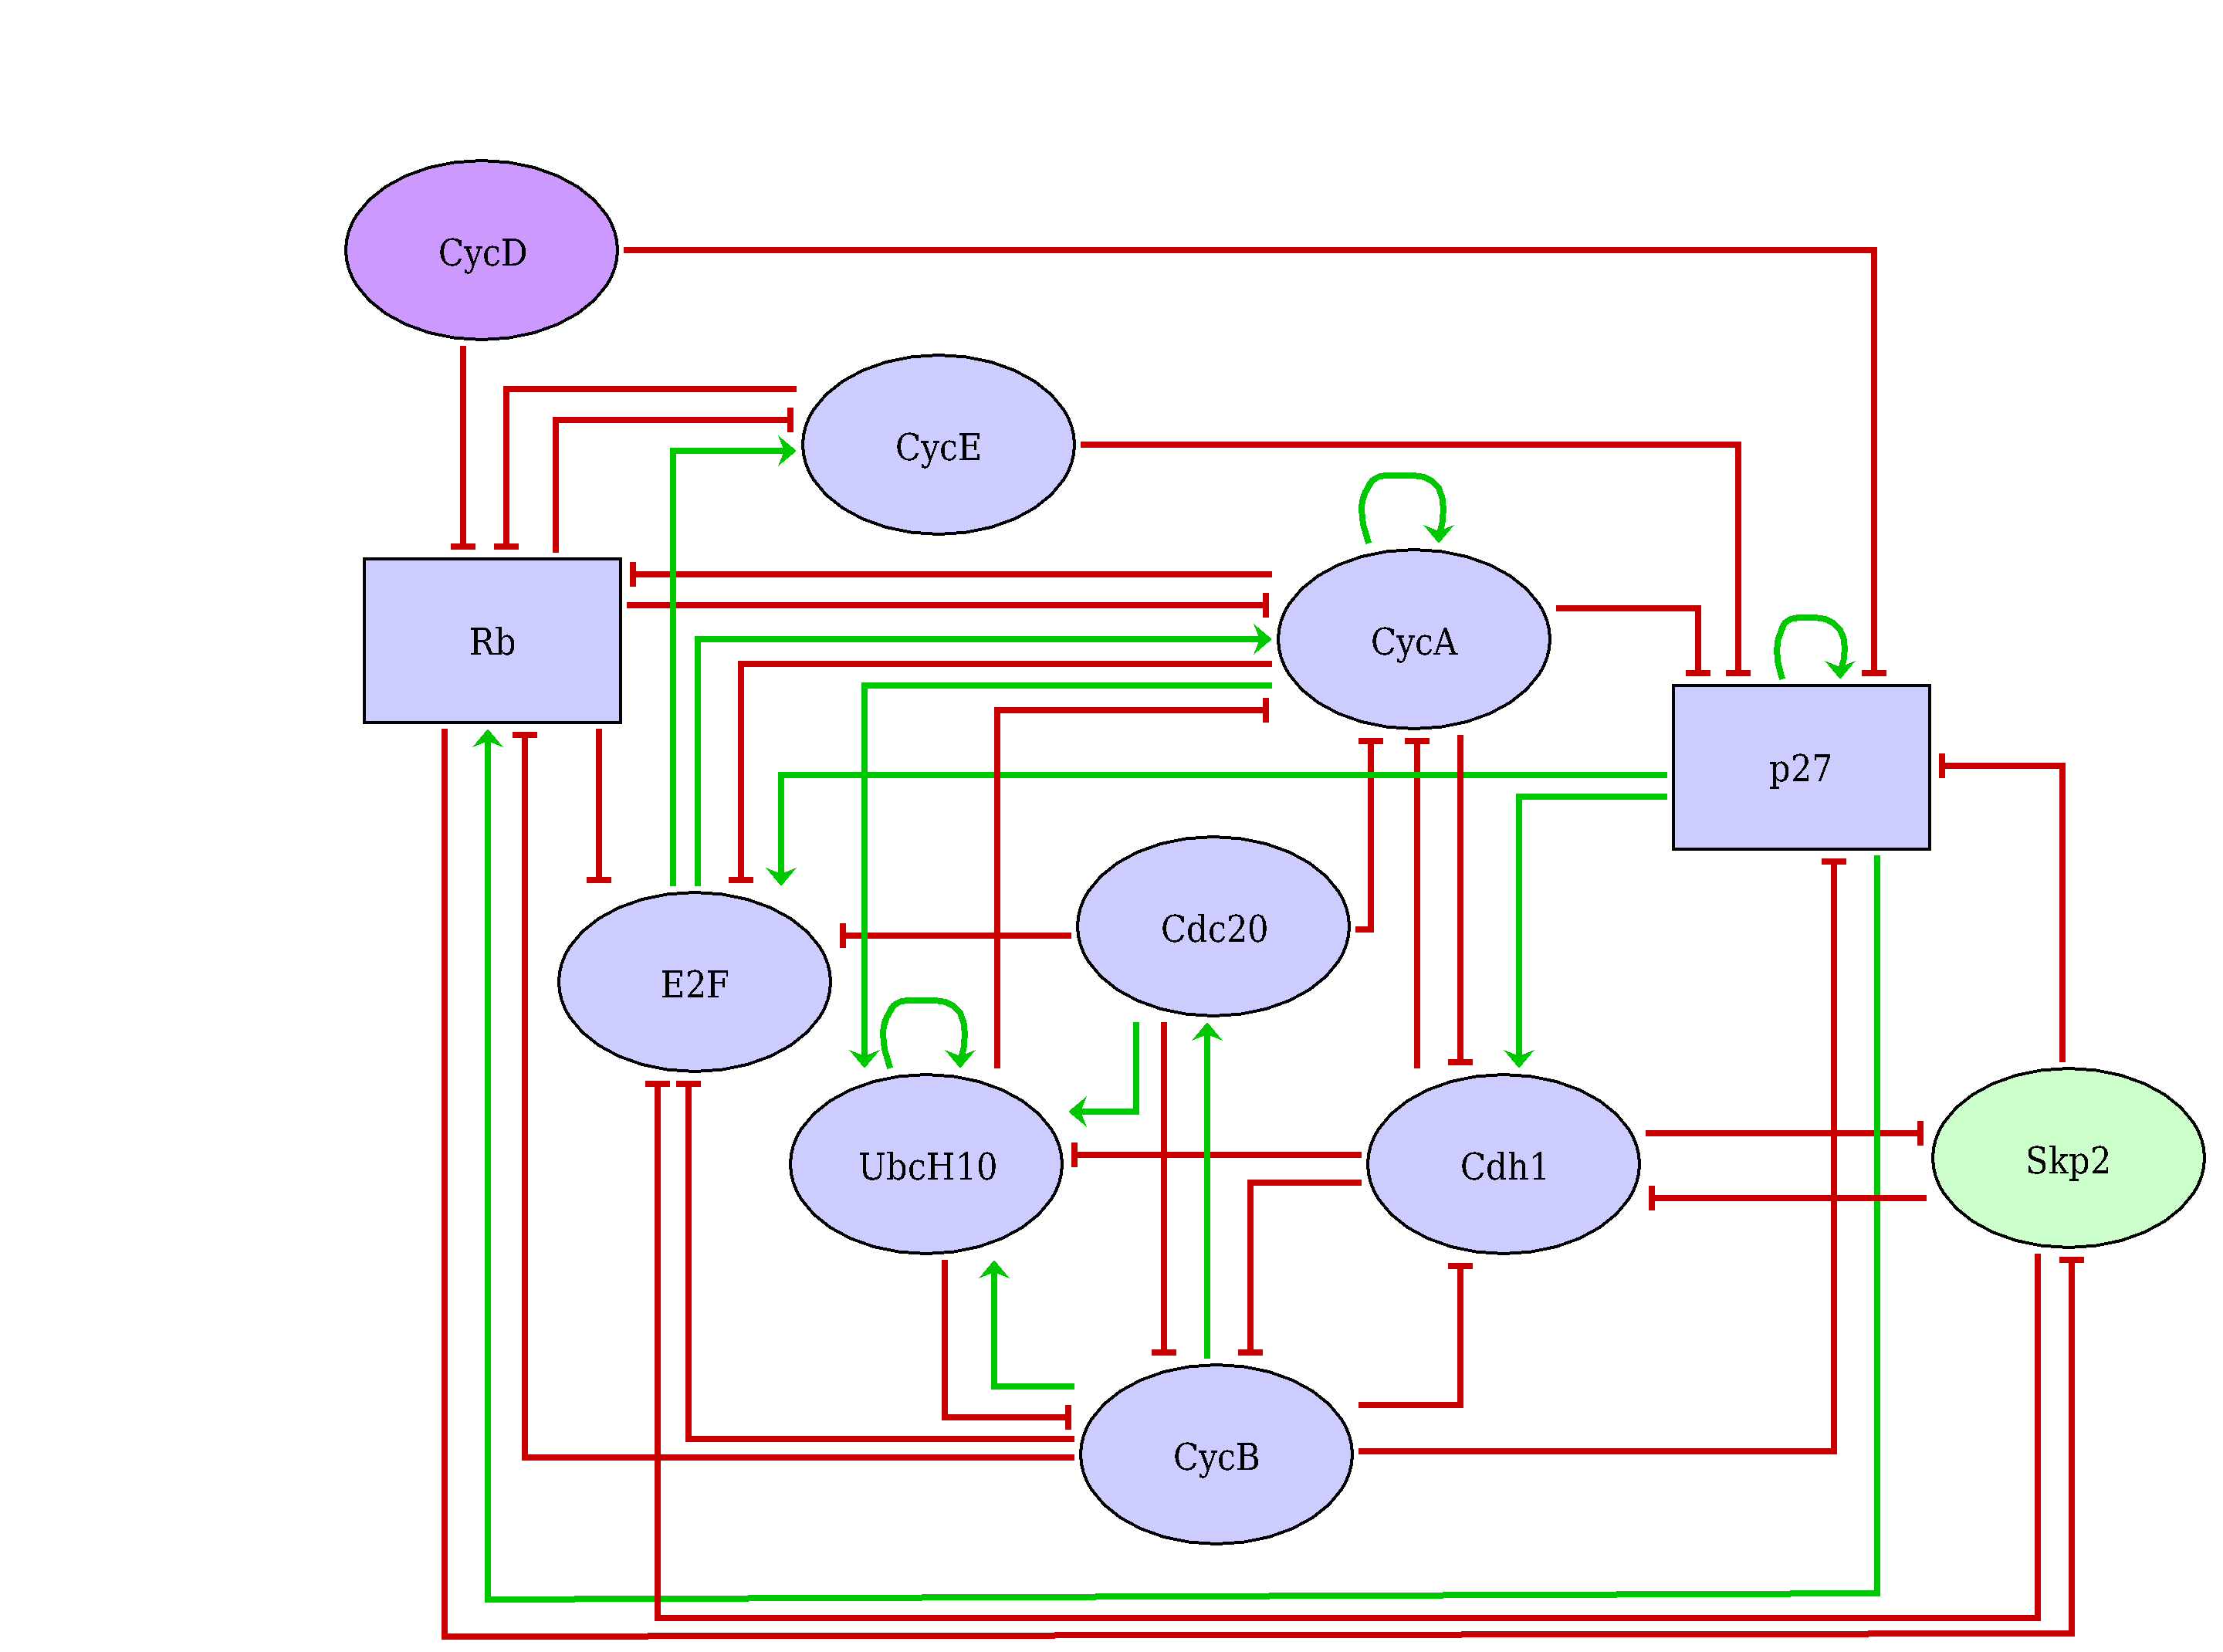

In [10]:
ginsim.show(lrg)

### Identification of stable state (asynchronous) - BIOLQM

1) Wild-type model

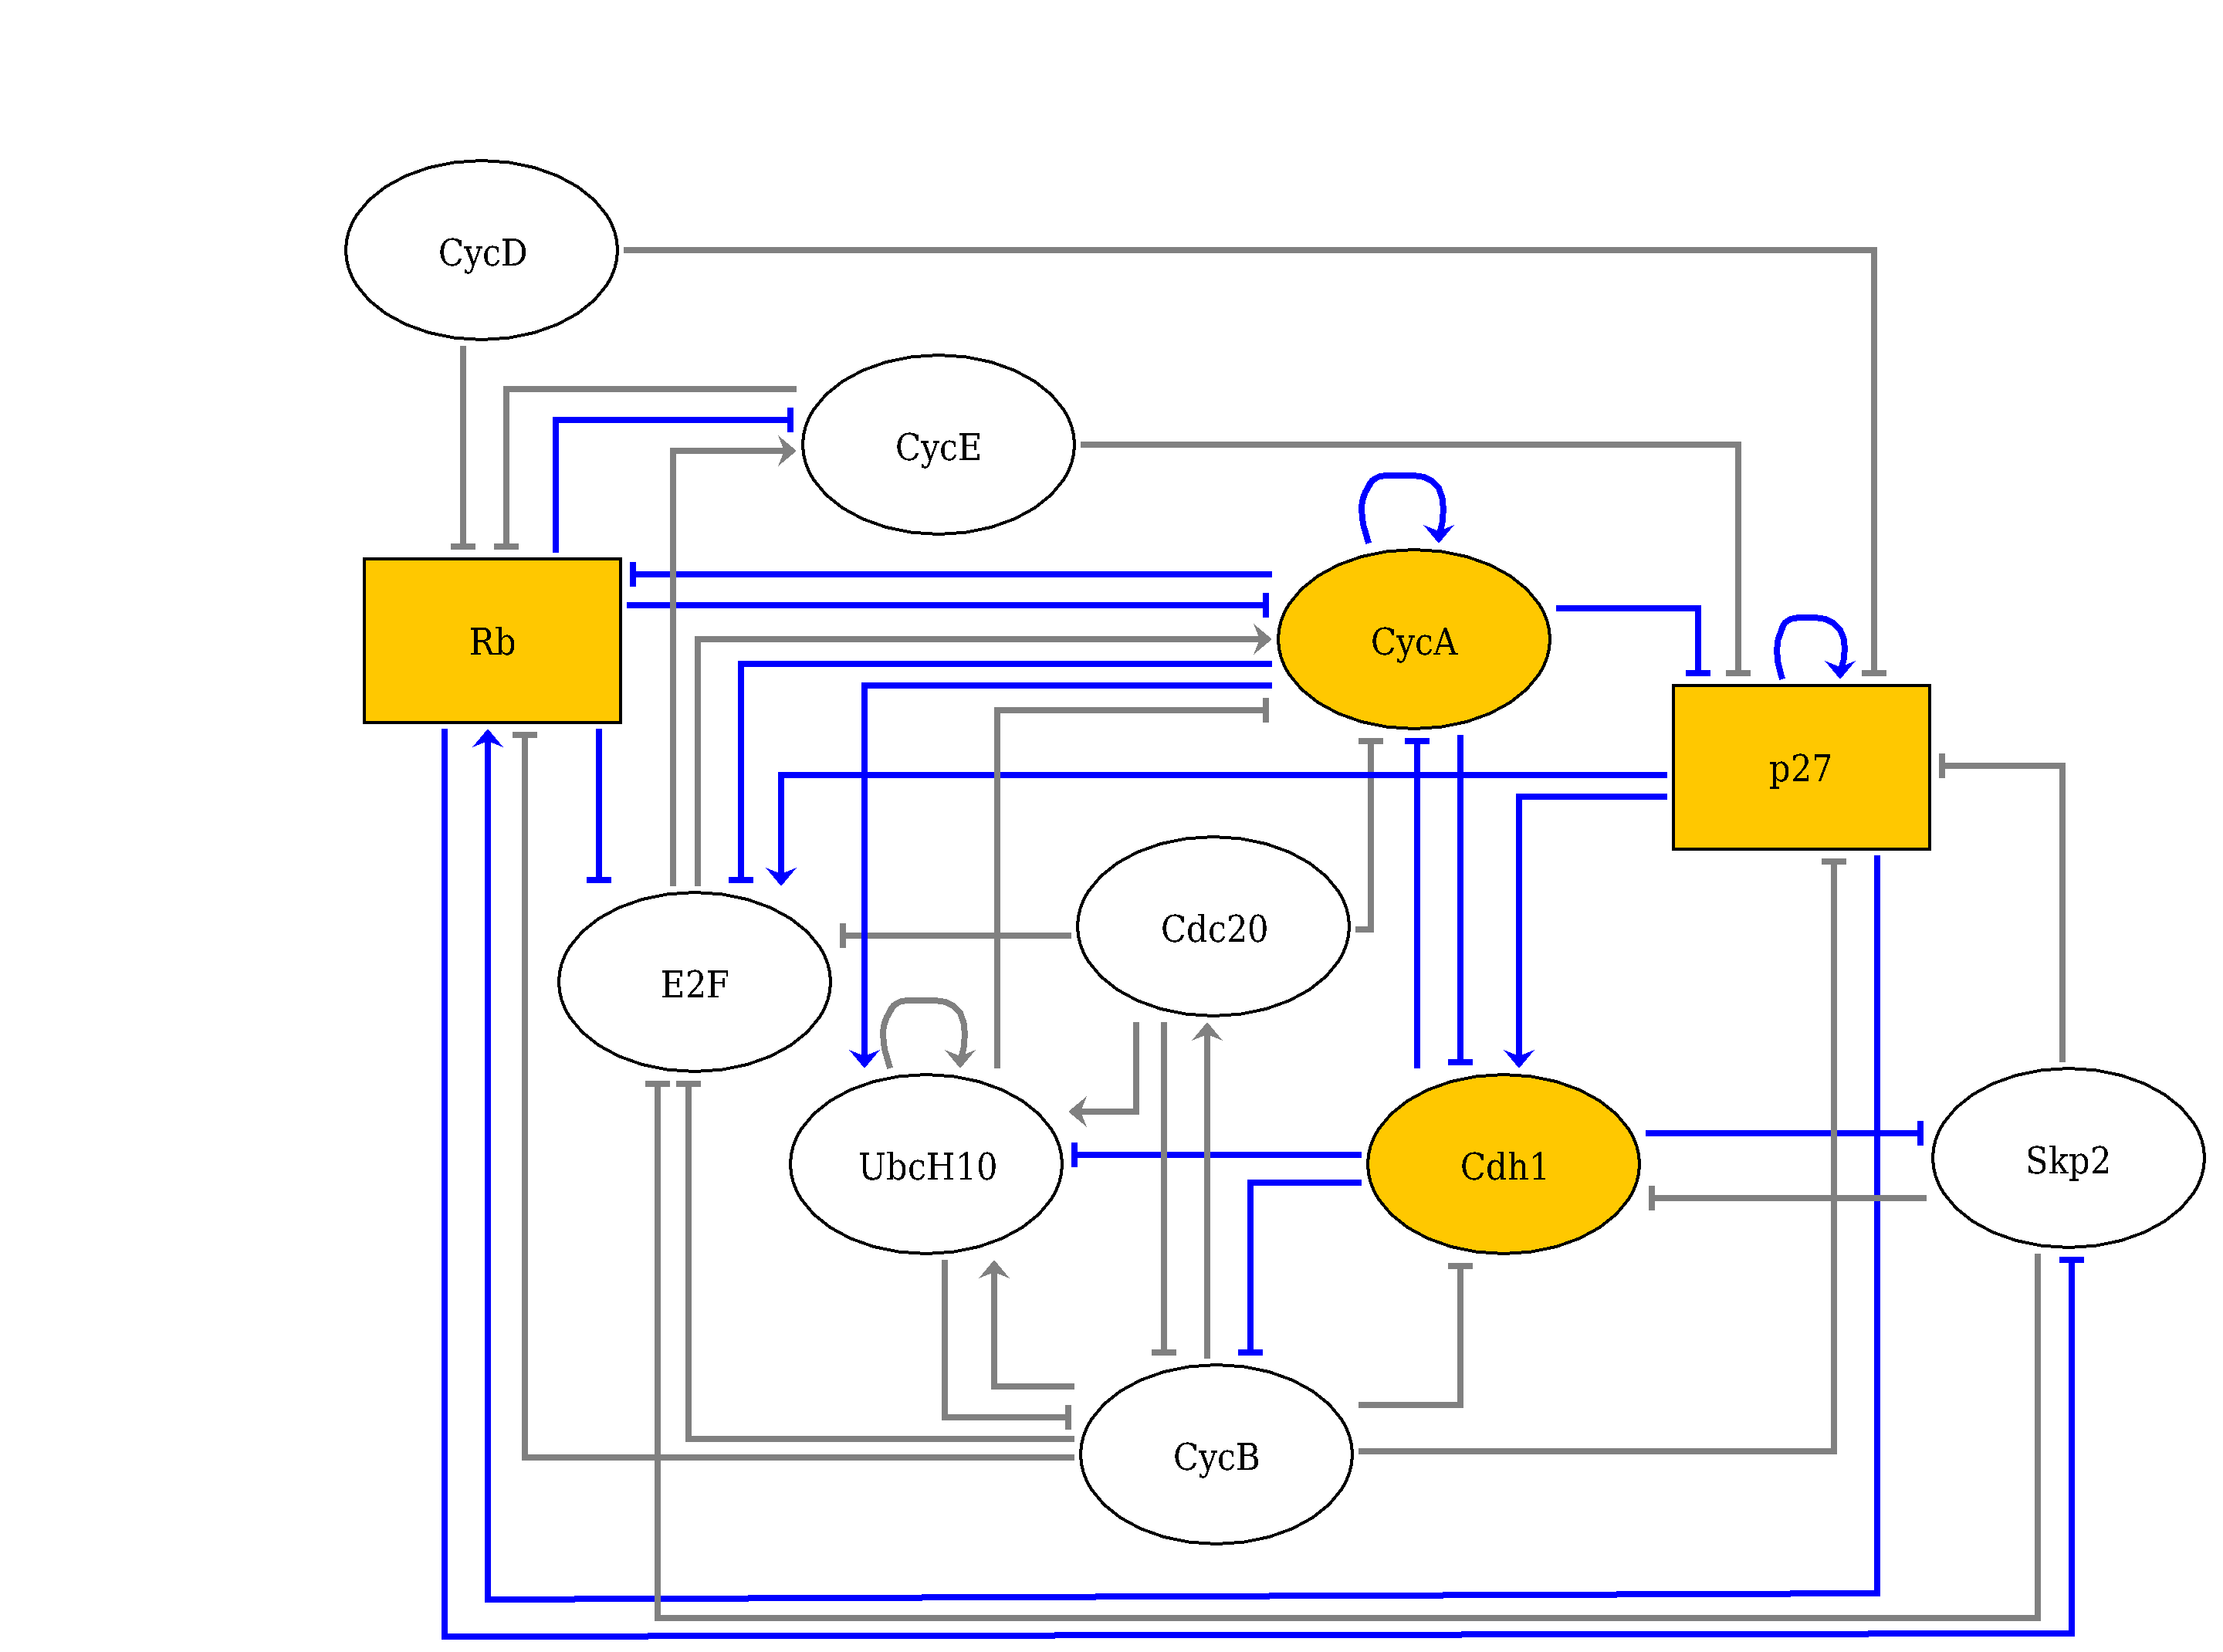

In [12]:
lqm = ginsim.to_biolqm(lrg)
fixpoints = biolqm.fixpoints(lqm)
tabulate(fixpoints)

ginsim.show(lrg, fixpoints[0])
ginsim.show(lrg, fixpoints[1])

Add trap space analysis to find cycle attractors

2) Perturbation: Ectopic CycE 

Ectopic = force the node to be at 1

In [12]:
ectopic_cyce = biolqm.perturbation(lqm,"CycE%1")
tabulate(biolqm.fixpoints(ectopic_cyce))

3) Perturbation: Ectopic p27

In [15]:
ectopic_p27 = biolqm.perturbation(lqm,"p27%1")
tabulate(biolqm.fixpoints(ectopic_p27))

4) Pertubation: Ectopic p27 and CycA

In [17]:
ectopic_p27_cycA = biolqm.perturbation(lqm,"p27%1 CycA%1")
tabulate(biolqm.fixpoints(ectopic_p27_cycA))

5) Perturbation: Ectopic p27 and CycE

In [20]:
ectopic_p27_cycE = biolqm.perturbation(lqm,"p27%1 CycE%1")
tabulate(biolqm.fixpoints(ectopic_p27_cycE))

6) Perturbation: Ectopic p27 and E2F

In [23]:
ectopic_p27_E2F = biolqm.perturbation(lqm,"p27%1 E2F%1")
tabulate(biolqm.fixpoints(ectopic_p27_E2F))

7) Perturbation: Ectopic Rb2

In [25]:
ectopic_Rb2 = biolqm.perturbation(lqm,"Rb%2")
tabulate(biolqm.fixpoints(ectopic_Rb2))

8) Perturbation: KO Cdh1

In [59]:
ko_Cdh1 = biolqm.perturbation(lqm,"Cdh1%0")
tabulate(biolqm.fixpoints(ko_Cdh1))

In [62]:
perturbations = ["CycE%1", 
                 "p27%1", 
                 "p27% CycA%1", 
                 "p27%1 CycE%1", 
                 "p27%1 E2F%1",
                 "Rb%2", "Cdh1%0", 
                 "Rb%0", 
                 "Rb%0 E2F%1", 
                 "E2F%1 Rb%1 CycE:Rb%0 CycA:Rb%0", 
                 "CycE%0 CycA%0", 
                 "UbcH10%0", 
                 "Rb%1 E2F:Rb%0 CycE:Rb%0 CycA:Rb%0", 
                 "E2F:Rb%0 CycE:Rb%0 CycA:Rb%0", 
                 "Skp2%0", 
                 "Skp2%0 p27%0", 
                 "Skp2%1 Rb%2 E2F:Rb%0 CycE:Rb%0 CycA:Rb%0", 
                 "Rb%1 p27%0 E2F:Rb%0 CycE:Rb%0 CycA:Rb%0"]

fixpointList = []

In [ ]:
for p in perturbations
    fixp

### MODEL CHECKING

In [23]:
from colomoto.temporal_logics import *

In [29]:
initial_state = S(CycE=0, CycA=0, CycB=0)

In [24]:
smv = ginsim.to_nusmv(lrg)

In [52]:
sequence = E[(initial_state) U (S(CycE=1, CycA=0, CycB=0) & E[S(CycE=1, CycA=0, CycB=0)])]

NameError: name 'E' is not defined

In [42]:
 U (S(CycE=1, CycA=1, CycB=0)) U 
   (S(CycE=0, CycA=1, CycB=0)) U (S(CycE=0, CycA=1, CycB=1)) U (S(CycE=0, CycA=0, CycB=1)) U (S(CycE=0, CycA=0, CycB=0))

NameError: name 'E' is not defined

In [58]:
transient_apoptosis = {EF(S(CycE=0, CycA=0, CycB=0))} U {EF(S(CycE=0, CycA=0, CycB=0))}

SyntaxError: invalid syntax (<ipython-input-58-270bfb3d7f61>, line 1)